In [9]:
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 9 columns):
Model           394 non-null object
MPG             394 non-null float64
Cylinders       394 non-null int64
Displacement    390 non-null float64
Horsepower      392 non-null float64
Weight          394 non-null float64
Acceleration    394 non-null float64
Year            394 non-null int64
Origin          392 non-null object
dtypes: float64(5), int64(2), object(2)
memory usage: 24.7+ KB


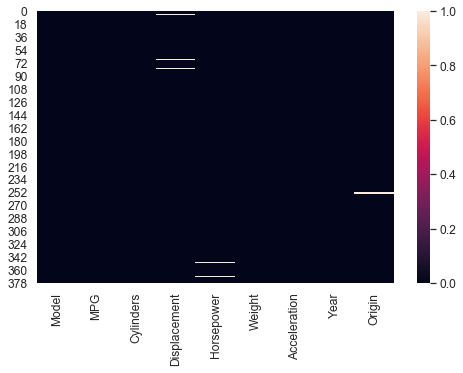

In [10]:
df_cars= pd.read_csv("cars.csv")
#Missing Values
df_cars.info()
df_cars.isnull().sum()
sns.heatmap(df_cars.isnull())

In [23]:
''' Missing Values Replacement with Mean and Mode'''

mean_disp=df_cars['Displacement'].mean()

mean_hp=df_cars['Horsepower'].mean()

mode_org='US'

df_cars['Mean_Replaced_Displacement']=df_cars['Displacement'].apply(lambda x: mean_disp if pd.isnull(x) else x)

df_cars['Mean_Replaced_Horsepower']=df_cars['Horsepower'].apply(lambda y: mean_hp if pd.isnull(y) else y)

df_cars['Mode_Replaced_Origin']=df_cars['Origin'].apply(lambda z: mode_org if pd.isnull(z) else z)




In [12]:
''' Missing Values Replacement with Random Value Generated from Distribution'''

import numpy as np

random_num=np.random.randn(2)

''' Scaling the value of standard normal random displacment to random normal displacement''' 
std_dev_disp=df_cars['Displacement'].std()
scaled_std_dev_disp=mean_disp + (random_num[0]*std_dev_disp)

''' Scaling the value of standard normal random horsepower to random normal horsepoewer''' 
std_dev_hp=df_cars['Horsepower'].std()
scaled_std_dev_hp=mean_hp + (random_num[1]*std_dev_hp)

df_cars['Dist_Replaced_Displacement']=df_cars['Displacement'].apply(lambda x: scaled_std_dev_disp if pd.isnull(x) else x)

df_cars['Dist_Replaced_Horsepower']=df_cars['Horsepower'].apply(lambda y: scaled_std_dev_hp if pd.isnull(y) else y)





In [24]:
df_cars['Dist_Replaced_Displacement'].mean()

190.66416805691242

In [25]:
df_cars['Mean_Replaced_Displacement'].mean()

192.6397435897436

In [26]:
df_cars['Displacement'].mean()

192.6397435897436

In [27]:
df_cars['Dist_Replaced_Displacement'].std()

104.412356407028

In [28]:
df_cars['Mean_Replaced_Displacement'].std()

102.56919260771915

In [29]:
df_cars['Displacement'].std()

103.09519191667046

In [30]:
df_cars['Dist_Replaced_Horsepower'].mean()

104.6222989425488

In [31]:
df_cars['Mean_Replaced_Horsepower'].mean()

104.46938775510205

In [32]:
df_cars['Horsepower'].mean()

104.46938775510205

In [33]:
df_cars['Dist_Replaced_Horsepower'].std()

38.45288155285825

In [34]:
df_cars['Mean_Replaced_Horsepower'].std()

38.393093123973614

In [35]:
df_cars['Horsepower'].std()

38.49115993282849

In [36]:
###############################################################################

''' Treating Misclassification'''

df_cars['Mode_Replaced_Origin'].value_counts()


def Origin(value):
    if value=='USA':
        return 'US'
    elif value=='France':
        return 'Europe'
    else:
        return value
    
df_cars['Mode_Replaced_Origin']=df_cars['Mode_Replaced_Origin'].apply(Origin)

df_cars['Mode_Replaced_Origin'].value_counts()


###############################################################################


US        246
Japan      79
Europe     69
Name: Mode_Replaced_Origin, dtype: int64

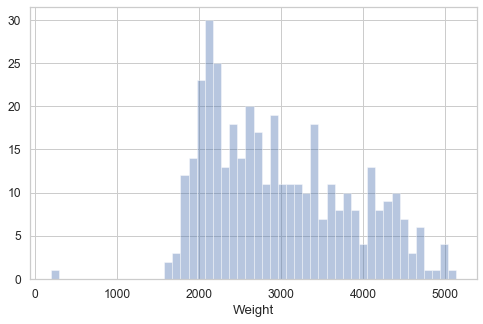

In [37]:

'''Outlier Detection using Z-Score'''

df_cars['Weight'].describe()

''' Frequency Distribution of Weights'''
sns.distplot(df_cars['Weight'], bins=50, kde=False)





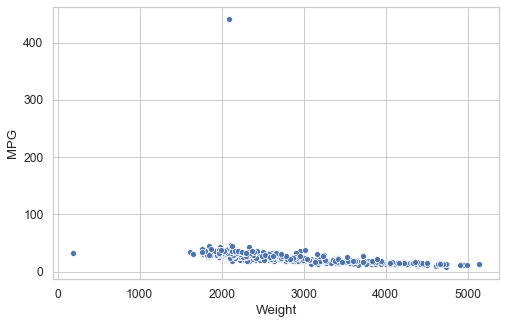

In [16]:
''' Scatter plot of Weights and MPG'''
sns.scatterplot(x=df_cars['Weight'], y=df_cars['MPG'])




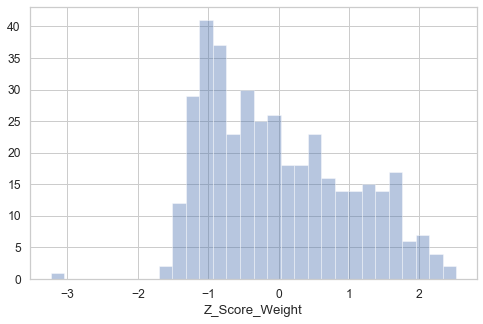

In [17]:
''' Z-Score Method'''
mean_weight=df_cars['Weight'].mean()
std_dev_weight=df_cars['Weight'].std()

df_cars['Z_Score_Weight']= df_cars['Weight'].apply(lambda x: (x-mean_weight)/std_dev_weight)

df_cars['Z_Score_Weight_Outlier_Flag']=df_cars['Z_Score_Weight'].apply(lambda x: 1 if x> 3 or x<-3 else 0)

sns.distplot(df_cars['Z_Score_Weight'], bins=30, kde=False)




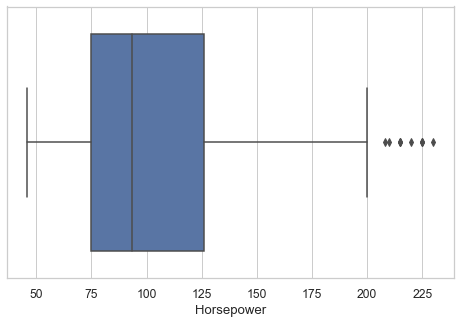

In [18]:
''' Outlier detection using Inter Quantile Range'''

weight_25_pcntl=df_cars['Weight'].quantile(0.25)
weight_75_pcntl=df_cars['Weight'].quantile(0.75)
weight_IQR=weight_75_pcntl-weight_25_pcntl

upper_range_IQR=weight_75_pcntl + 1.5*weight_IQR
lower_range_IQR=weight_25_pcntl - 1.5*weight_IQR

df_cars['IQR_Weight_Outlier_Flag']=df_cars['Weight'].apply(lambda x: 1 if x> upper_range_IQR or x< lower_range_IQR else 0)

df_cars['Horsepower'].describe()
sns.boxplot(x='Horsepower', data=df_cars)

In [19]:
###############################################################################M

''' Min- Max Normalization'''

weight_min=df_cars['Weight'].min()
weight_max=df_cars['Weight'].max()
weight_range=weight_max-weight_min

df_cars['Normalized_Weight']=df_cars['Weight'].apply(lambda x: (x-weight_min)/weight_range)


###############################################################################

''' Categorical Transformation'''
''' Home Work- To do Origin Transformation'''


' Home Work- To do Origin Transformation'

In [20]:
data=pd.get_dummies(df_cars)

In [21]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Mean_Replaced_Displacement,Mean_Replaced_Horsepower,Dist_Replaced_Displacement,...,Model_vw rabbit c (diesel),Model_vw rabbit custom,Origin_Europe,Origin_France,Origin_Japan,Origin_US,Origin_USA,Mode_Replaced_Origin_Europe,Mode_Replaced_Origin_Japan,Mode_Replaced_Origin_US
0,18.0,8,307.0,130.0,3504.0,12.0,70,307.000000,130.000000,307.000000,...,0,0,0,0,0,1,0,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,350.000000,165.000000,350.000000,...,0,0,0,0,0,1,0,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,318.000000,150.000000,318.000000,...,0,0,0,0,0,0,1,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,304.000000,150.000000,304.000000,...,0,0,0,0,0,1,0,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,302.000000,140.000000,302.000000,...,0,0,0,0,0,1,0,0,0,1
5,15.0,8,NaN,198.0,4341.0,10.0,70,192.639744,198.000000,-1.954446,...,0,0,0,0,0,1,0,0,0,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,454.000000,220.000000,454.000000,...,0,0,0,0,0,1,0,0,0,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,440.000000,215.000000,440.000000,...,0,0,0,0,0,1,0,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,455.000000,225.000000,455.000000,...,0,0,0,0,0,0,1,0,0,1
9,15.0,8,390.0,190.0,3850.0,8.5,70,390.000000,190.000000,390.000000,...,0,0,0,0,0,1,0,0,0,1


In [22]:
df_cars

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,Mean_Replaced_Displacement,Mean_Replaced_Horsepower,Mode_Replaced_Origin,Dist_Replaced_Displacement,Dist_Replaced_Horsepower,Z_Score_Weight,Z_Score_Weight_Outlier_Flag,IQR_Weight_Outlier_Flag,Normalized_Weight
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,307.000000,130.000000,US,307.000000,130.000000,0.620590,0,0,0.669328
1,buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,350.000000,165.000000,US,350.000000,165.000000,0.840924,0,0,0.707529
2,plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,USA,318.000000,150.000000,US,318.000000,150.000000,0.541317,0,0,0.655584
3,amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,US,304.000000,150.000000,US,304.000000,150.000000,0.537819,0,0,0.654977
4,ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,302.000000,140.000000,US,302.000000,140.000000,0.556472,0,0,0.658211
5,ford galaxie 500,15.0,8,NaN,198.0,4341.0,10.0,70,US,192.639744,198.000000,US,-1.954446,198.000000,1.596353,0,0,0.838504
6,chevrolet impala,14.0,8,454.0,220.0,4354.0,9.0,70,US,454.000000,220.000000,US,454.000000,220.000000,1.611508,0,0,0.841132
7,plymouth fury iii,14.0,8,440.0,215.0,4312.0,8.5,70,US,440.000000,215.000000,US,440.000000,215.000000,1.562545,0,0,0.832643
8,pontiac catalina,14.0,8,455.0,225.0,4425.0,10.0,70,USA,455.000000,225.000000,US,455.000000,225.000000,1.694279,0,0,0.855483
9,amc ambassador dpl,15.0,8,390.0,190.0,3850.0,8.5,70,US,390.000000,190.000000,US,390.000000,190.000000,1.023952,0,0,0.739262
